In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install joypy

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import json

f = open('rankings.json', 'r')

original_data = json.load(f)
f.close()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import joypy

In [4]:

import scipy.stats as stats

def norm(mu, sigma, n = 1000):
  a = mu - 3*sigma
  b = mu + 3*sigma
  dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
  return dist.rvs(n)

In [5]:
# created the basic data structure that will be plotted

data = []
for i in range(len(original_data)):
  d = original_data[i]
  n = 100000
  values = norm(d['mu'], d['sigma'], n)  
  font = str(i+1).zfill(2) + '. ' + d['font']
  for j in range(n):
    data.append([font, values[j]])
  
df = pd.DataFrame(data, columns=['Font', 'Value'])
print(df)

                   Font      Value
0       01. Baskerville  24.579311
1       01. Baskerville  26.904843
2       01. Baskerville  26.577716
3       01. Baskerville  23.446374
4       01. Baskerville  25.464990
5       01. Baskerville  25.305310
6       01. Baskerville  26.594340
7       01. Baskerville  25.732073
8       01. Baskerville  25.348136
9       01. Baskerville  27.002423
10      01. Baskerville  26.268497
11      01. Baskerville  24.615102
12      01. Baskerville  26.437952
13      01. Baskerville  24.558558
14      01. Baskerville  26.529121
15      01. Baskerville  25.436351
16      01. Baskerville  25.295876
17      01. Baskerville  27.001936
18      01. Baskerville  25.310742
19      01. Baskerville  26.178784
20      01. Baskerville  25.871980
21      01. Baskerville  24.459551
22      01. Baskerville  24.647794
23      01. Baskerville  24.352902
24      01. Baskerville  26.438571
25      01. Baskerville  25.753726
26      01. Baskerville  25.567487
27      01. Baskervi

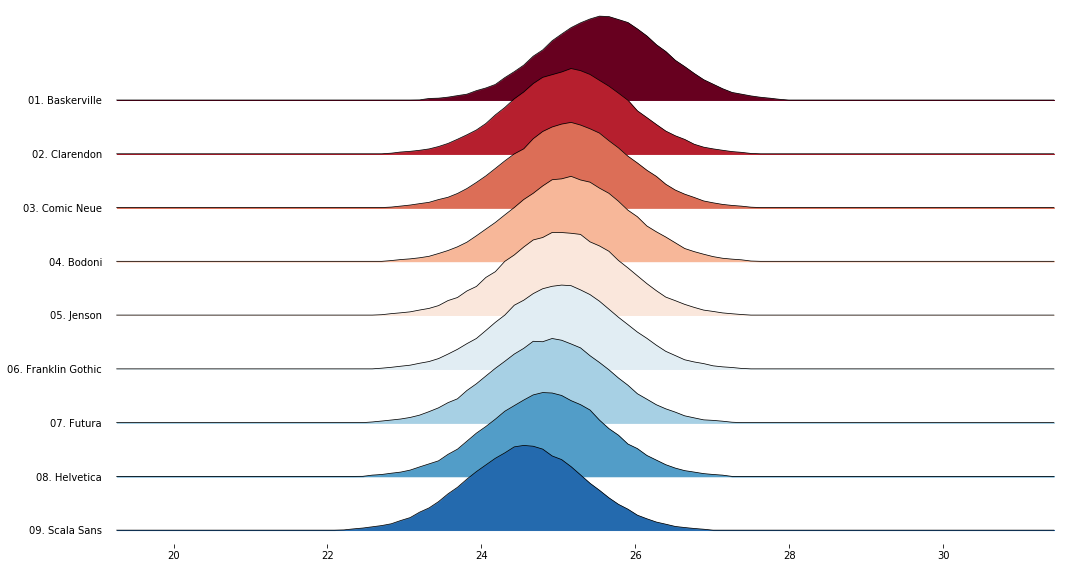

In [6]:
%matplotlib inline

from matplotlib import cm

fig, axes = joypy.joyplot(df, by="Font", 
                          grid=False, colormap=cm.RdBu, linewidth=0.75, x_range=[19.2,31.5],
                          legend=False, overlap=1, figsize=(15,8), kind="counts", bins=100)

fig.savefig("rank_general.svg")
